# EDA for VED: One file

Using the databse built with SQLite try to come up with data analysis.

In [25]:
import sqlite3
import pandas as pd

import missingno as msno 

In [26]:
# connect to database
conn = sqlite3.connect('../databases/ved.db')

# create a cursor
c = conn.cursor()


In [27]:
df = pd.read_sql("SELECT * FROM signals", conn)

In [29]:
df.head()

,signal_id,day_num,vehicle_id,trip_id,time_stamp,latitude,longitude,speed,maf,rpm,...,ac_power_kw,ac_power_w,heater_power_w,hv_bat_current,hv_bat_soc,hv_bat_volt,st_ftb_1,st_ftb_2,lt_ftb_1,lt_ftb_2
0,1,1.586651,8,706,0,42.277558,-83.69875,40.0,22.129999,2285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.586651,8,706,200,42.277558,-83.69875,40.0,22.129999,2285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.586651,8,706,1100,42.277558,-83.69875,45.0,22.129999,2285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.586651,8,706,2100,42.277558,-83.69875,47.0,6.150000,2744.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.586651,8,706,4200,42.277558,-83.69875,48.0,21.440001,1982.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,DayNum,VehId,Trip,Timestamp_ms,Latitude_deg,Longitude_deg,VehicleSpeed_km_h,MAF_g_sec,Engine_rpm,AbsoluteLoad_perc,...,AirConditioningPower_kw,AirConditioningPower_w,HeaterPower_w,HVBatteryCurrent_a,HVBatterySOC,HVBattery,ShortTermFuelTrimBank1,ShortTermFuelTrimBank2,LongTermFuelTrimBank1,LongTermFuelTrimBank2
count,489414.000000,489414.000000,489414.000000,4.894140e+05,489414.000000,489414.000000,488657.000000,399747.000000,485024.000000,359632.000000,...,16073.000000,39096.000000,3633.000000,55169.000000,55169.000000,55169.000000,71630.000000,22967.000000,71630.000000,22967.000000
mean,4.550381,368.314004,772.226481,4.865857e+05,42.271751,-83.731072,37.981551,10.301399,1180.788386,28.657684,...,1.400709,127.418918,644.783925,-12.885413,35.496294,299.079602,-0.086981,-0.338801,0.872321,1.724451
std,1.912305,149.619209,445.524309,7.041786e+05,0.021100,0.031597,26.649203,11.097956,722.121437,19.733802,...,2.412826,268.364181,647.894263,41.709933,33.946843,69.016984,4.232303,4.681999,3.954095,4.054208
min,1.002938,8.000000,2.000000,0.000000e+00,42.220316,-83.804136,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-222.950012,0.000000,181.000000,-27.343750,-21.093750,-14.843750,-13.281250
25%,2.877139,234.000000,457.000000,1.290000e+05,42.256627,-83.749562,15.000000,3.090000,704.000000,14.901961,...,0.000000,0.000000,0.000000,-33.500000,1.000000,204.000000,-1.562500,-2.343750,-1.562500,-0.781250
50%,4.570542,382.000000,743.000000,3.080000e+05,42.274517,-83.734967,40.000000,5.680000,1233.000000,23.529411,...,0.200000,0.000000,500.000000,-6.850037,29.369625,317.500000,0.000000,0.000000,0.781250,2.343750
75%,5.911235,494.000000,1015.000000,6.013000e+05,42.285402,-83.703509,57.000000,15.070000,1647.000000,43.529411,...,0.400000,150.000000,1000.000000,9.279999,63.780487,356.375000,1.562500,1.562500,3.125000,4.687500
max,7.999698,608.000000,2519.000000,8.646500e+06,42.325568,-83.674021,135.000000,165.550003,5502.000000,543.921570,...,6.320000,1350.000000,2250.000000,151.029999,100.000000,395.375000,36.718750,34.375000,17.187500,10.156250


In [ ]:
## Missing Values

<AxesSubplot:>

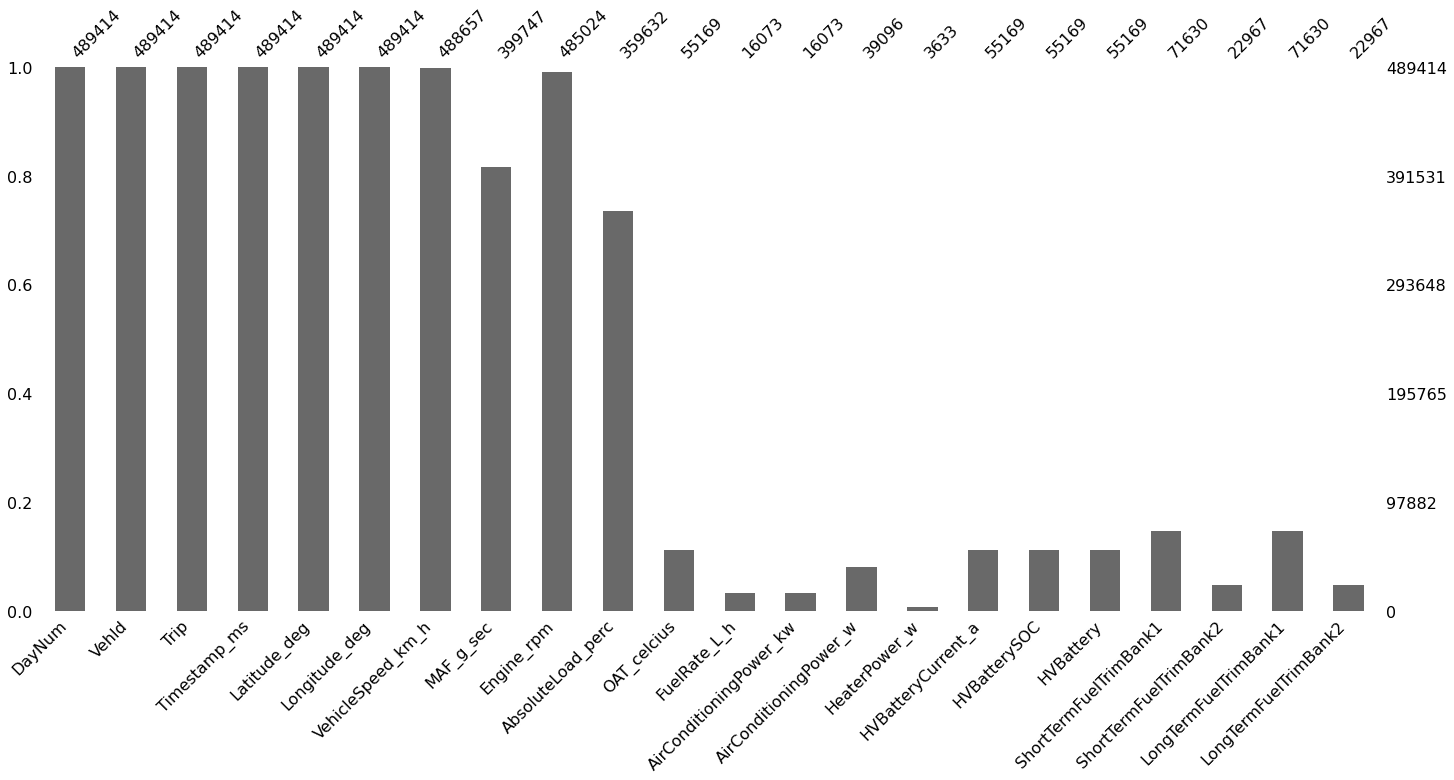

In [12]:
msno.bar(df)

In [13]:
no_of__missing = df.isna().sum()
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'feature': df.columns,
    'no_missing': no_of__missing,
    'percent_missing': percent_missing})
missing_value_df= missing_value_df.drop(['feature'], axis=1)
missing_value_df

,no_missing,percent_missing
DayNum,0,0.000000
VehId,0,0.000000
Trip,0,0.000000
Timestamp_ms,0,0.000000
Latitude_deg,0,0.000000
Longitude_deg,0,0.000000
VehicleSpeed_km_h,757,0.154675
MAF_g_sec,89667,18.321299
Engine_rpm,4390,0.896991
AbsoluteLoad_perc,129782,26.517836


In [18]:
df_no_miss_val = pd.read_sql("""SELECT DayNum, VehId, Trip, Timestamp_ms, Latitude_deg, Longitude_deg
                             FROM veds""", conn)

In [19]:
df_no_miss_val.head()

,DayNum,VehId,Trip,Timestamp_ms,Latitude_deg,Longitude_deg
0,1.586651,8,706,0.0,42.277558,-83.69875
1,1.586651,8,706,200.0,42.277558,-83.69875
2,1.586651,8,706,1100.0,42.277558,-83.69875
3,1.586651,8,706,2100.0,42.277558,-83.69875
4,1.586651,8,706,4200.0,42.277558,-83.69875


In [20]:
df = df_no_miss_val.copy()

In [24]:
1.586651*10**10

15866510000.0

In [ ]:
1586651194

In [34]:
import os
from tqdm.notebook import tqdm

In [59]:
data_path= '../../../../../../Documents/tblx/VED-master/Data/Data_all/'

In [60]:
files = [os.path.join(data_path, file) for file in tqdm(os.listdir(data_path)) if file.endswith(".csv")]

In [88]:
len(files)

54

In [84]:
def read_xlsx_files(xlsx_path):
    print("\n Reading File...")
    get_filenames = [os.path.join(xlsx_path, file) for file in tqdm(os.listdir(xlsx_path)) if file.endswith(".xlsx")]

    df = []
    for filenames in get_filenames:
        df_temp = pd.read_excel(filenames, header=None).replace('NO DATA', np.nan)
        df.append(df_temp)
    return df

In [85]:
import numpy as np

In [86]:
df = read_xlsx_files('../dataset/files_xlsx') 


 Reading File...


In [74]:
print(list(df.columns()))

AttributeError: 'list' object has no attribute 'columns'

In [87]:
df

[        0           1              2                                    3  \
 0   VehId  EngineType  Vehicle Class  Engine Configuration & Displacement   
 1       9        PHEV            Car                  4-GAS/ELECTRIC 1.4L   
 2      10          EV            Car                             ELECTRIC   
 3      11        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 4     371        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 5     379        PHEV            Car                  4-GAS/ELECTRIC 1.4L   
 6     388        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 7     398        PHEV            Car                  4-GAS/ELECTRIC 1.8L   
 8     417        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 9     431        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 10    443        PHEV            Car                  4-GAS/ELECTRIC 2.0L   
 11    449        PHEV            Car                  4-GAS/ELE